In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


# Basic Single Qubit Functions

In [2]:
def constant_zero(circ,inqbit,outqbit):
    return

def constant_one(circ,inqbit,outqbit):
    circ.x(outqbit)

def identity(circ,inqbit,outqbit):
    circ.cx(inqbit,outqbit)

def negation(circ,inqbit,outqbit):
    circ.cx(inqbit,outqbit)
    circ.x(outqbit)


# The Deustch Oracle

In [3]:
# Define a two qubit quantum circuit 
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')

inqbit = q[1]
outqbit = q[0]

circ = QuantumCircuit(q,c)

## Pre Processing

In [4]:
# Apply negation on both input and output
circ.x(inqbit)
circ.x(outqbit)

# Apply Handmard's gate on both as well, to get superposition
circ.h(inqbit)
circ.h(outqbit)

## Apply the Black Box Function

In [5]:
function = identity

In [6]:
function(circ,inqbit,outqbit)

## Post Processing and Measurement

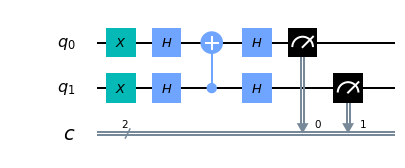

In [7]:
circ.h(inqbit)
circ.h(outqbit)

# Do the measuring
circ.measure(q,c)
circ.draw(output="mpl")

# Simulation

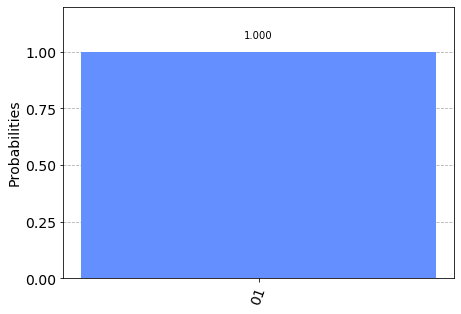

In [8]:
# Simulation of circuit 
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ,backend=simulator, shots=1024)
result = job.result()

#Histogram plot of results
counts = result.get_counts(circ)

plot_histogram(counts)

# Running on Quantum Device

Job Status: job has successfully run


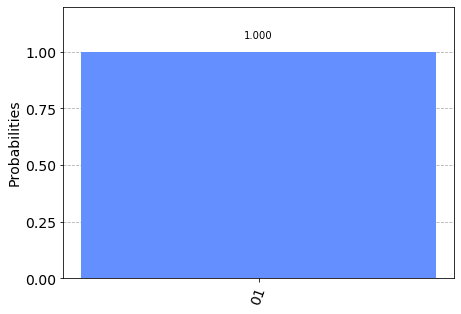

In [9]:
lb_device = least_busy(provider.backends())

job = execute(circ, backend=lb_device, shots=1024)
job_monitor(job)

result = job.result()

#Histogram plot of results
counts = result.get_counts(circ)

plot_histogram(counts)

$$|\psi\rangle = |11\rangle \text{ if the black box function is constant.}$$

$$|\psi\rangle = |01\rangle \text{ if the black box function is variable.}$$